In [18]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(10)
n_estimator = 10

In [12]:
# create dataset
X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# train gbdt
gbdt = GradientBoostingClassifier(n_estimators=n_estimator)
gbdt_enc = OneHotEncoder()
gbdt_lr = LogisticRegression()
gbdt.fit(X_train, y_train)
# create gbdt features
gbdt_enc.fit(gbdt.apply(X_train)[:,:,0])
# train LR model using gbdt features
gbdt_lr.fit(gbdt_enc.transform(gbdt.apply(X_train)[:, :, 0]), y_train)
# prediction
y_pred_gbdt_lr = gbdt_lr.predict_proba(gbdt_enc.transform(gbdt.apply(X_test)[:, :, 0]))[:, 1]
print(y_pred_gbdt_lr)
# measure
auc = roc_auc_score(y_test, y_pred_gbdt_lr)
print('auc =', auc)

[0.0025912  0.99789177 0.99789177 ... 0.00952003 0.9815705  0.0025912 ]
auc = 0.9890787995456187


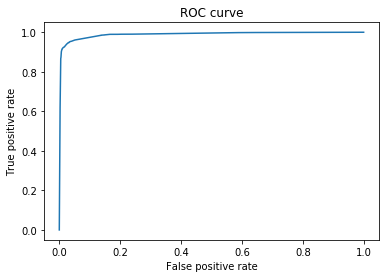

In [30]:
# plot
fpr_gbdt_lr, tpr_gbdt_lr, _ = roc_curve(y_test, y_pred_gbdt_lr)
# print(fpr_gbdt_lr)
fig = plt.figure()
plt.plot(fpr_gbdt_lr, tpr_gbdt_lr, label='GBDT+LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()